# Grupowanie hierarchiczne
## Mateusz Baran
### 155620

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv('data/VLagun_Total_Basins_plank_cluster.csv')
data.head()

,Cyanobacteria,Chlorophyceae,Euglenophyceae,Diatomophyceae,Flagellata,Dinoflagellata,Cryptophytes,picophytoplankton,Bosmina longirostris,Ceriodaphnia sp.,...,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis
0,2.35,3.08,0.92,0.230,0.00,0.0,0.00,3.20,0.0,0.0,...,1.3152,0.8920,0.2714,0.0000,0.0313,0.0,0.0000,0.0000,0.0045,0.0009
1,6.39,2.87,0.49,0.010,0.00,0.0,0.00,2.42,0.0,0.0,...,0.0769,0.0640,0.0464,0.0000,0.0111,0.0,0.0000,0.0437,0.0041,0.0020
2,2.05,7.47,0.00,0.060,0.17,0.0,0.00,2.61,0.0,0.0,...,0.0466,0.0120,0.0044,0.0000,0.0000,0.0,0.0001,0.0000,0.0000,0.0000
3,6.30,5.03,0.00,0.110,0.10,0.0,0.00,2.49,0.0,0.0,...,0.0313,0.0079,0.0040,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
4,3.77,5.69,0.00,0.005,0.04,0.0,0.02,1.73,0.0,0.0,...,0.0491,0.0143,0.0019,0.0026,0.0000,0.0,0.0001,0.0000,0.0000,0.0000


Text(0.5, 1.0, '1.0')

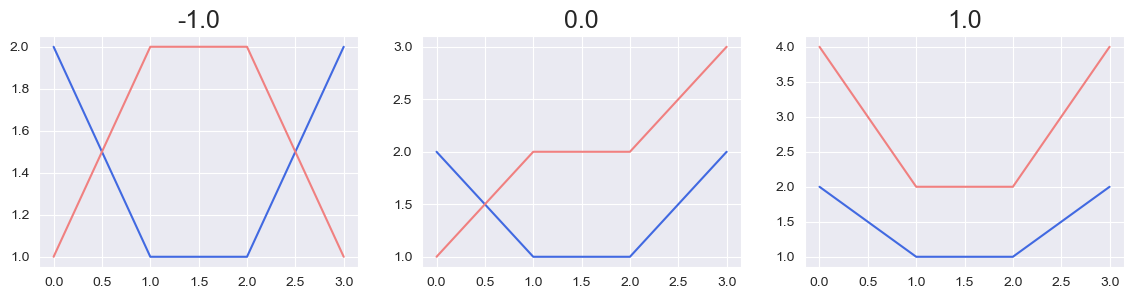

In [70]:
plt.figure(figsize=(14,3))
line1 = np.array([2,1,1,2])
line2 = np.array([1,2,2,1])

plt.subplot(131)
plt.plot(line1, color='royalblue')
plt.plot(line2, color='lightcoral')
plt.title(np.corrcoef(line1, line2)[1,0], fontsize=18)

line1 = np.array([2,1,1,2])
line2 = np.array([1,2,2,3])

plt.subplot(132)
plt.plot(line1, color='royalblue')
plt.plot(line2, color='lightcoral')
plt.title(round(np.corrcoef(line1, line2)[1,0],2), fontsize=18)

line1 = np.array([2,1,1,2])
line2 = 2*line1

plt.subplot(133)
plt.plot(line1, color='royalblue')
plt.plot(line2, color='lightcoral')
plt.title(np.corrcoef(line2, 2*line2)[1,0], fontsize=18)

<Axes: >

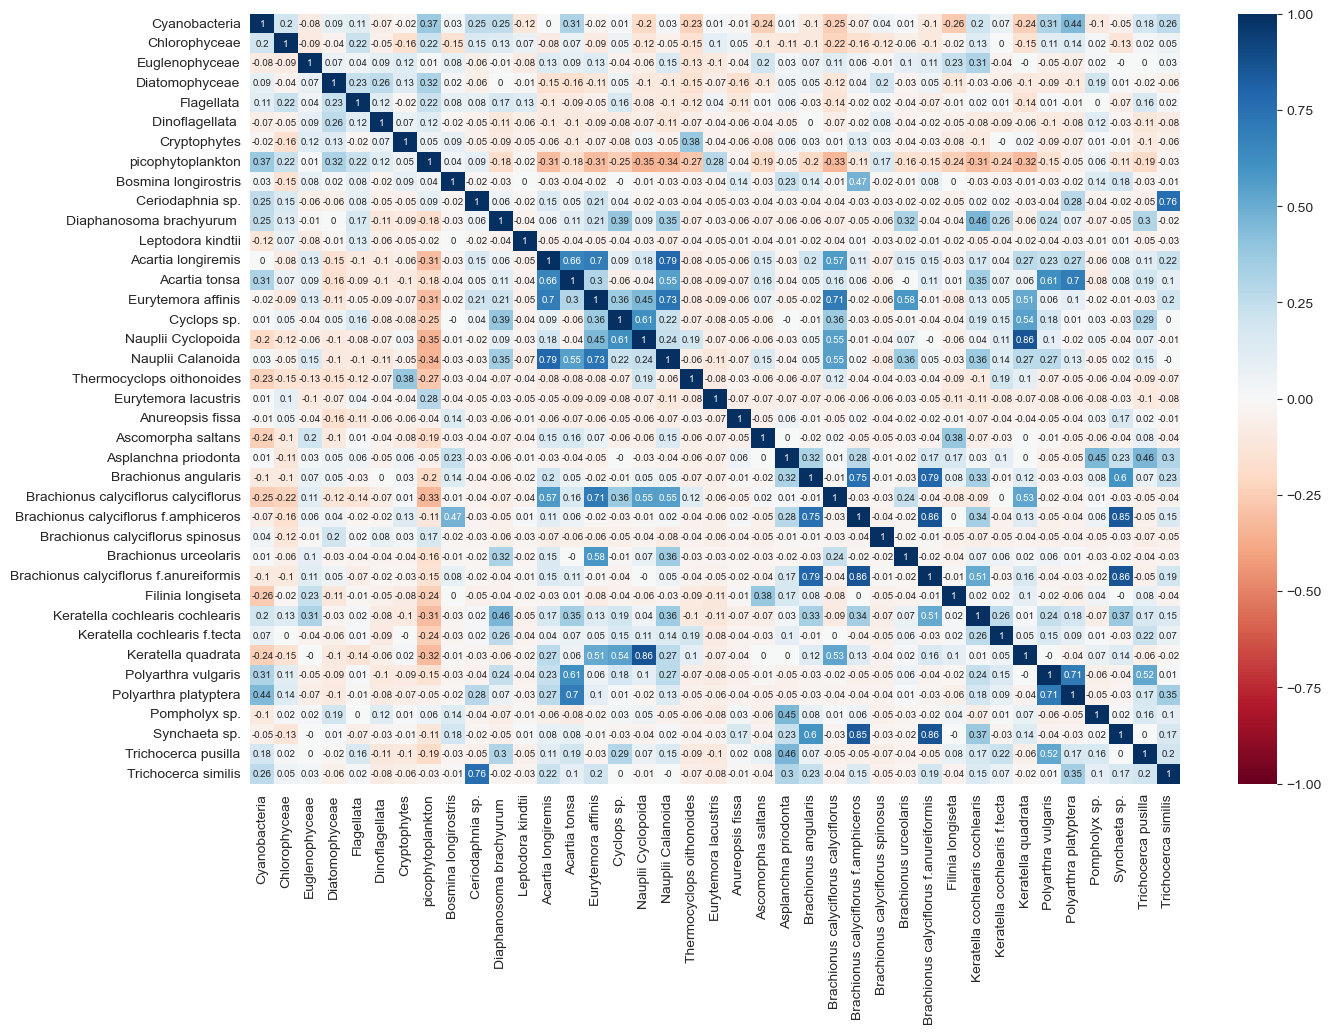

In [83]:
plt.figure(figsize=(15,10))
correlations = data.corr()
sns.heatmap(round(correlations, 2), cmap='RdBu', annot=True, annot_kws={'size': 7}, vmin=-1, vmax=1)

### Ten wykres jest bardzo słabo czytelny, dlatego zostanie wykonane grupowanie hierarchiczne

In [72]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [65.0, 65.0, 90.0, 90.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [122.5, 122.5, 152.5, 152.5],
  [77.5, 77.5, 137.5, 137.5],
  [21.875, 21.875, 107.5, 107.5],
  [175.0, 175.0, 185.0, 185.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [203.75, 203.75, 250.0, 250.0],
  [180.0, 180.0, 226.875, 226.875],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [375.0, 375.0, 385.0, 

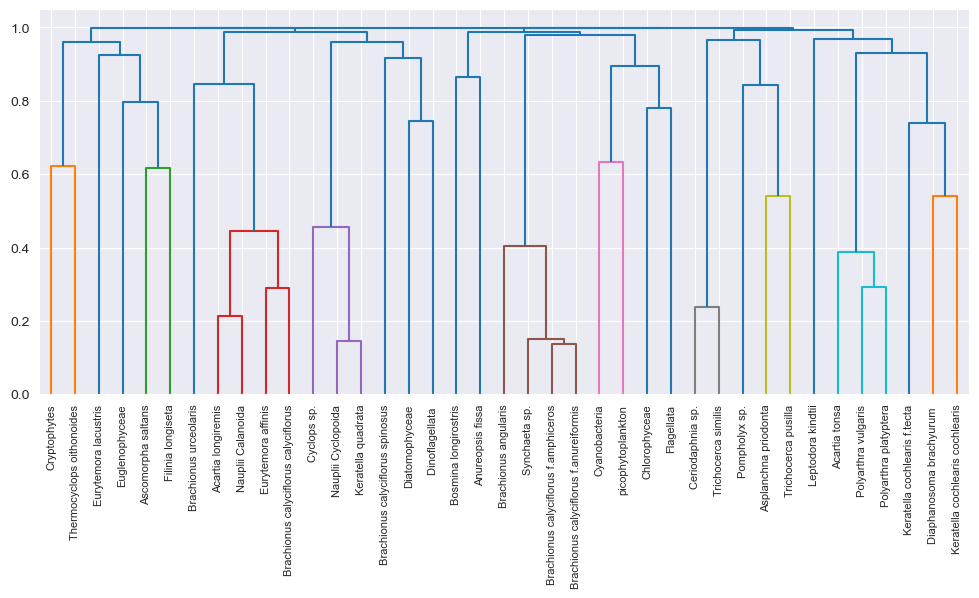

In [73]:
plt.figure(figsize=(12,5))
dissmilarity = 1 - abs(correlations)
Z = linkage(squareform(dissmilarity), 'complete')
dendrogram(Z, labels=data.columns, orientation='top', leaf_rotation=90)

In [74]:
# Clusterize the data
threshold = 0.1
labels = fcluster(Z, threshold, criterion='distance')

In [75]:
labels_order = np.argsort(labels)

for idx, i in enumerate(data.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(data[i])
    else:
        df_to_append = pd.DataFrame(data[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

<Axes: >

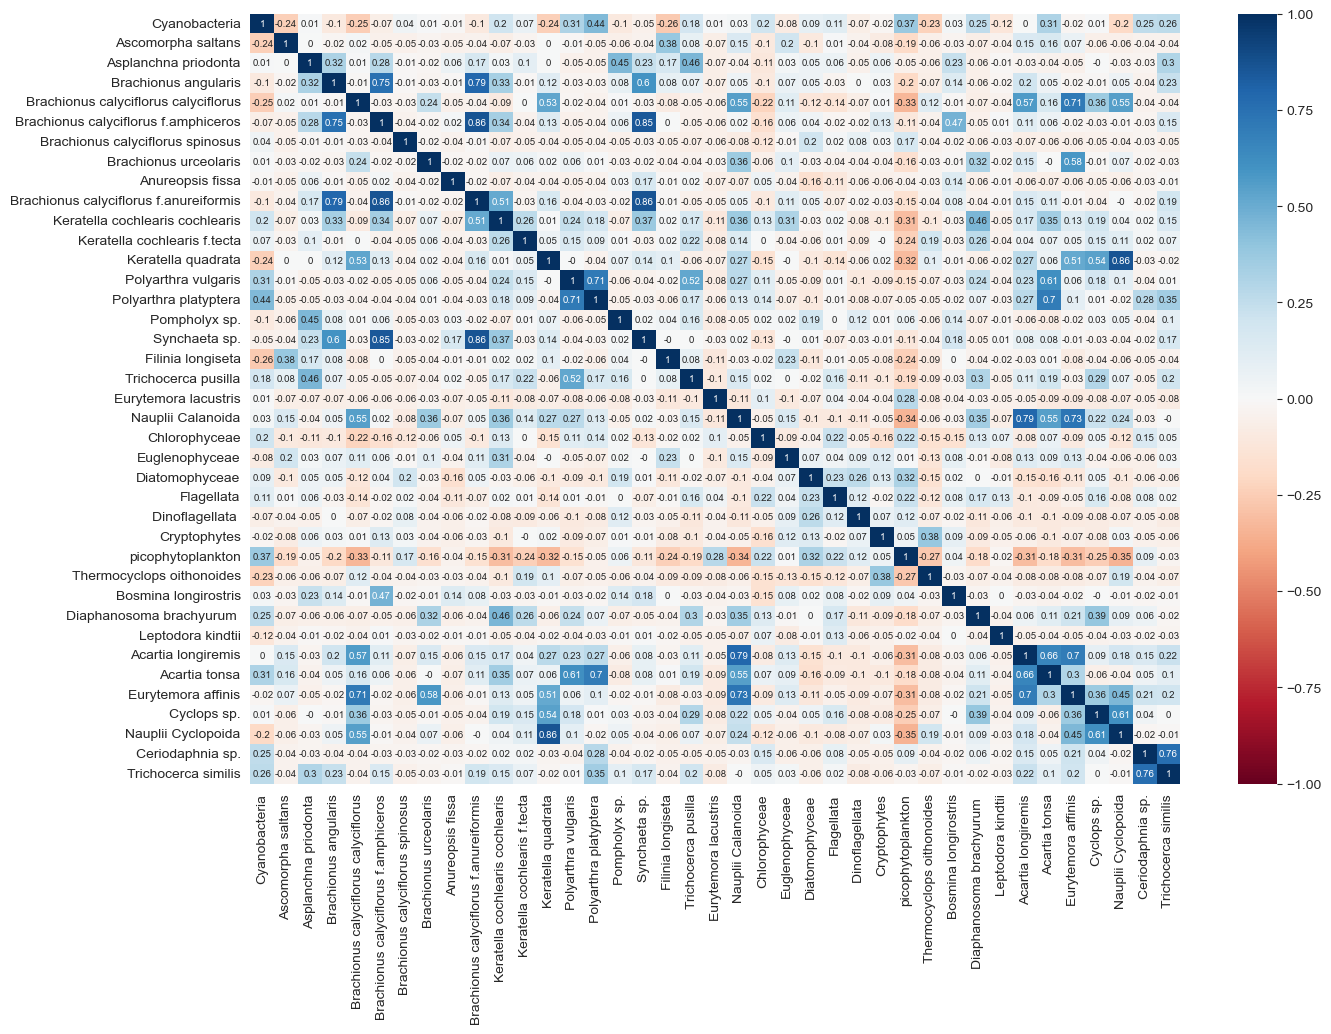

In [80]:
plt.figure(figsize=(15,10))
correlations = clustered.corr()
sns.heatmap(round(correlations, 2), cmap='RdBu', annot=True, annot_kws={'size': 7}, vmin=-1, vmax=1)

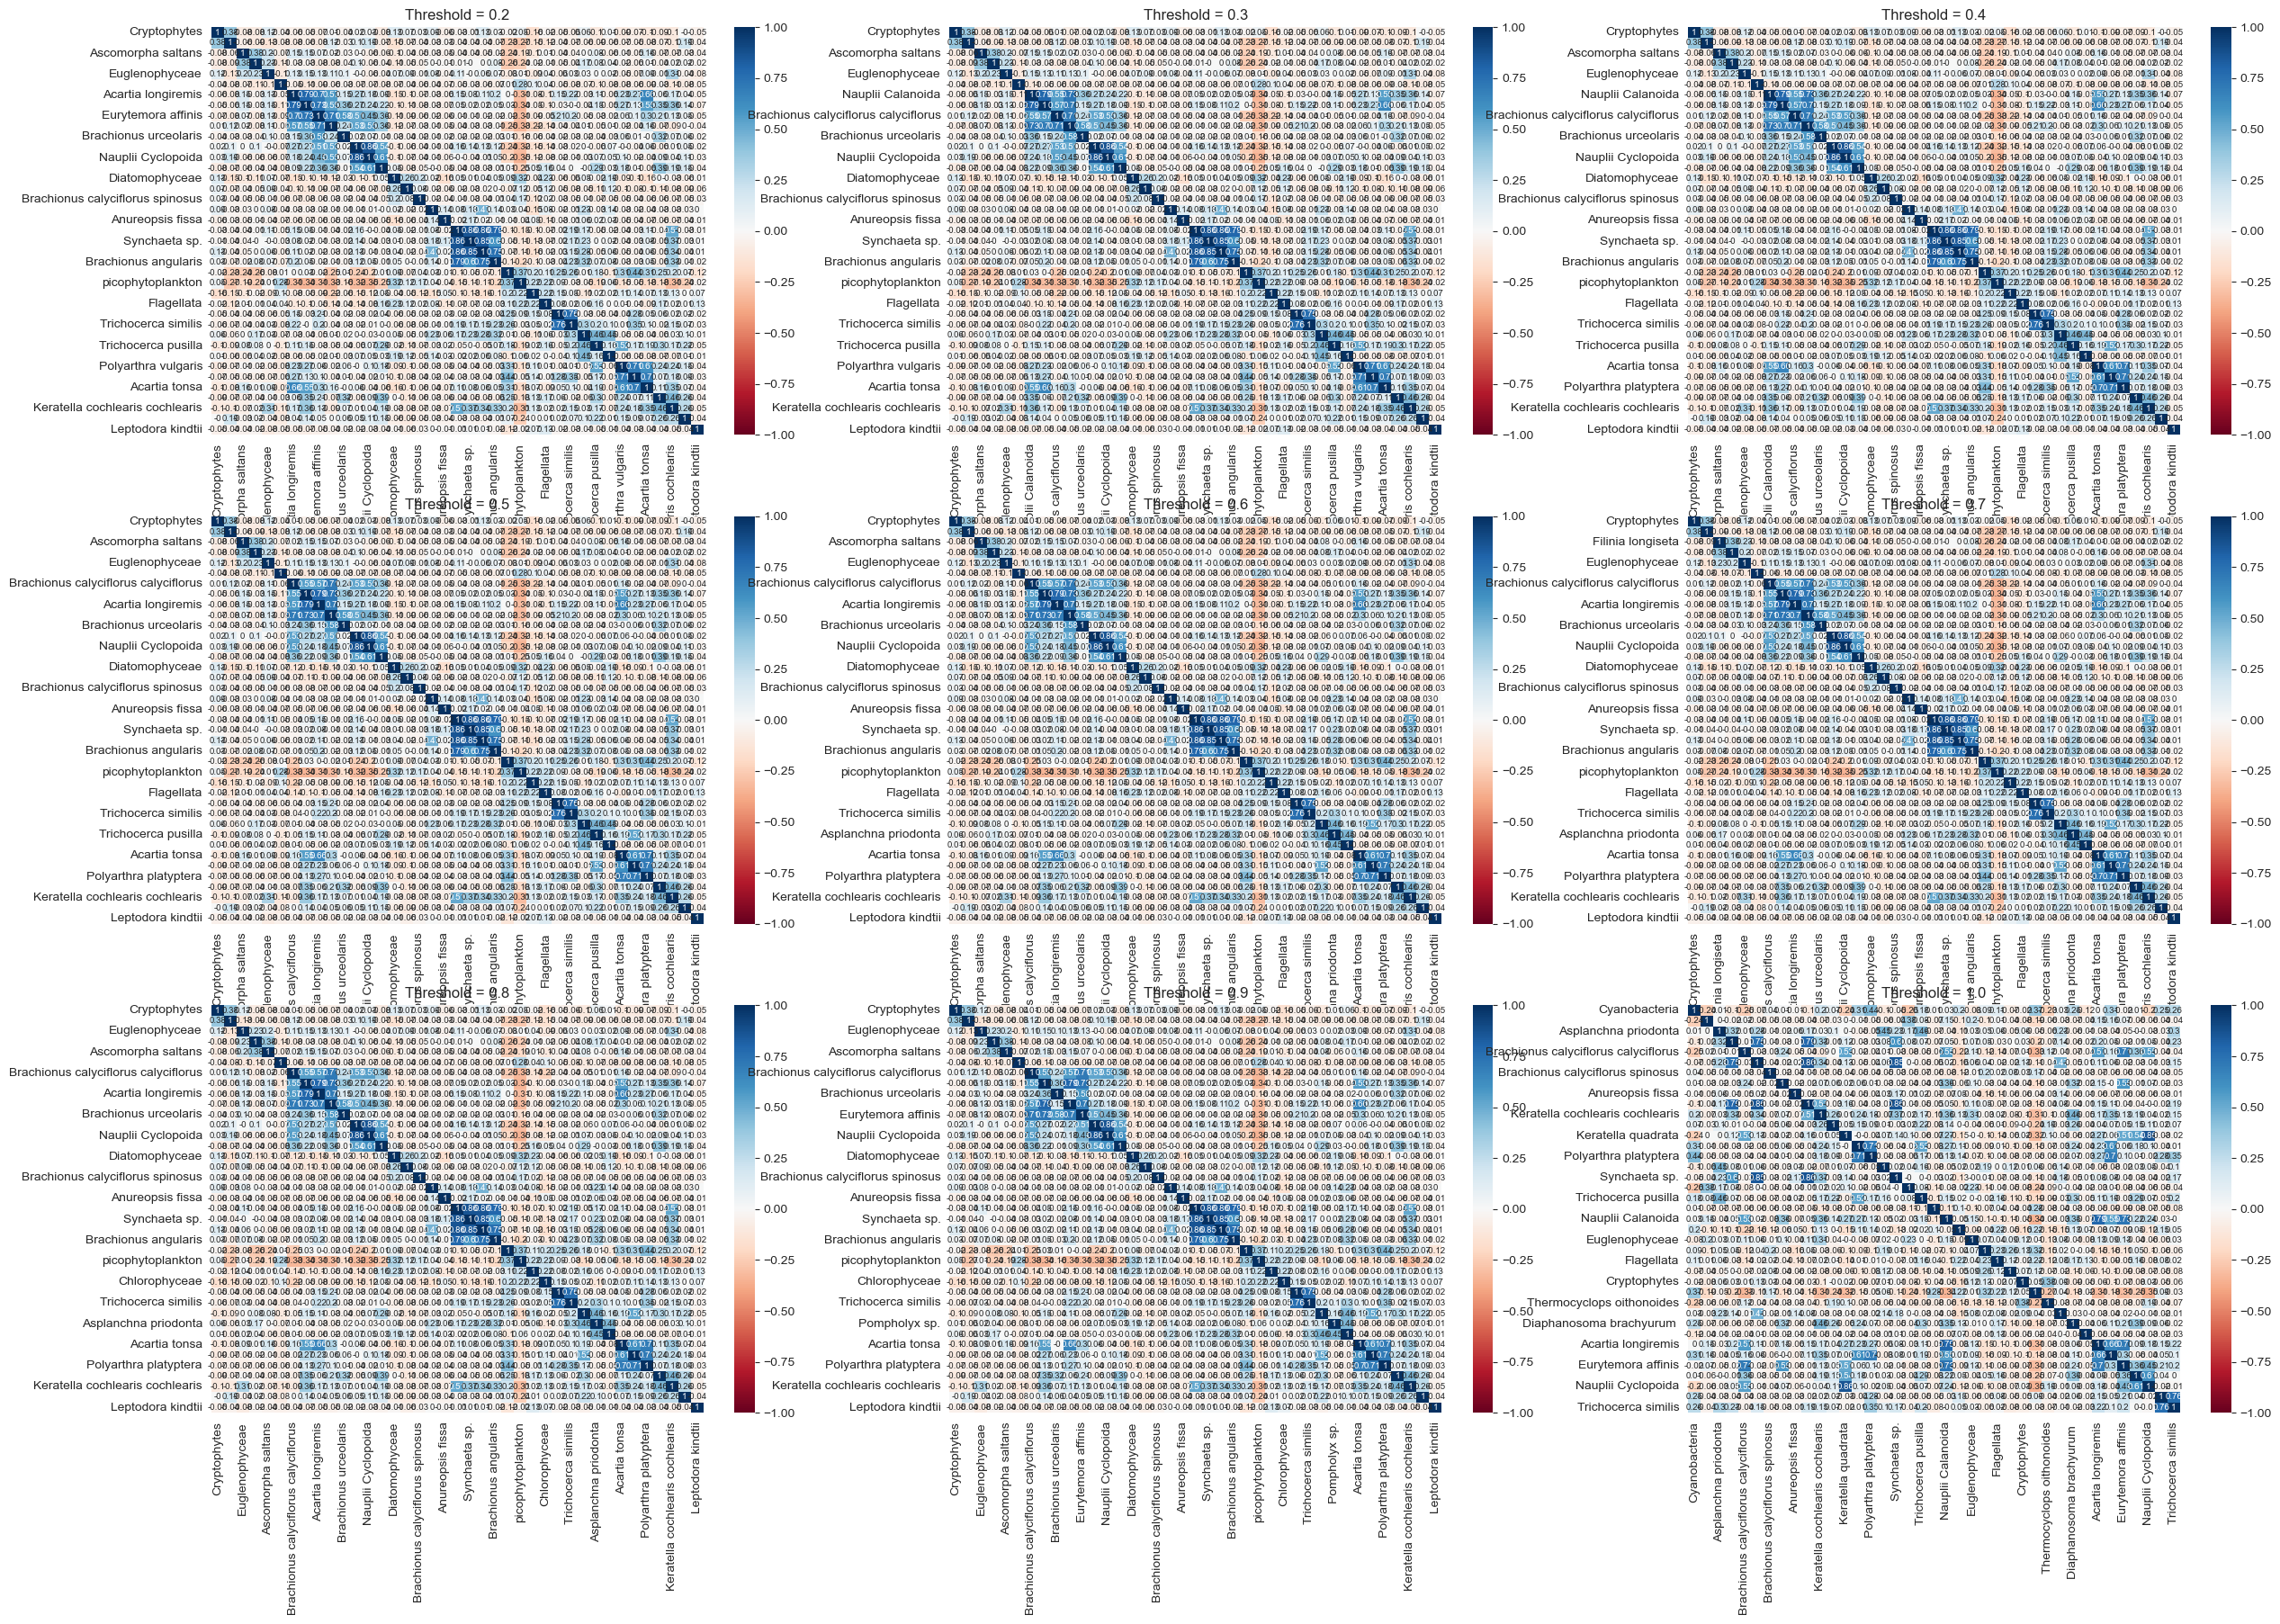

In [82]:
plt.figure(figsize=(30,20))
for idx, t in enumerate(np.arange(0.2,1.1,0.1)):
    plt.subplot(3,3, idx+1)
    labels = fcluster(Z, t, criterion='distance')
    labels_order = np.argsort(labels)

    for idx, i in enumerate(data.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(data[i])
        else:
            df_to_append = pd.DataFrame(data[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
    correlations = clustered.corr()
    sns.heatmap(round(correlations, 2), cmap='RdBu', annot=True, annot_kws={'size': 7}, vmin=-1, vmax=1)
    plt.title('Threshold = {}'.format(round(t, 2)))

In [78]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [79]:
model = AgglomerativeClustering(n_clusters=6)
yhat = model.fit(Z)
yhat_2 = model.fit_predict(Z)
clusters = np.unique(yhat)

score_AGclustering_s = silhouette_score(Z, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(Z, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(Z, yhat_2)
print(f'silhouette_score {score_AGclustering_s}')
print(f'calinski_harabasz_score {score_AGclustering_c}')
print(f'davies_bouldin_score {score_AGclustering_d}')

silhouette_score 0.38248022018324823
calinski_harabasz_score 58.45263034916804
davies_bouldin_score 0.655636060104465
